# Predict handwritten digits with Pytorch

In [2]:
import torch
import torchvision
from torchvision import transforms

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

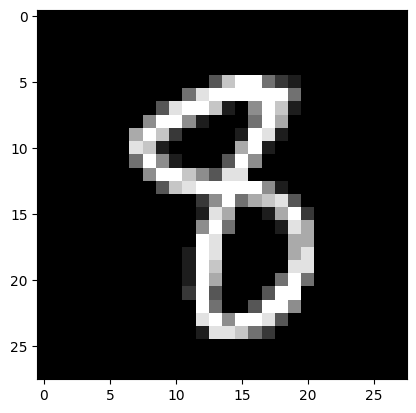

tensor(8)


In [3]:
import matplotlib.pyplot as plt

dataiter = iter(train_loader)
images, labels = next(dataiter)

plt.imshow(images[6].numpy().squeeze(), cmap='gray')
plt.show()

print(labels[6])

In [4]:
images[6].shape

torch.Size([1, 28, 28])

<br>

__Build a network with:__

- 1st layer: Flatten
- 2nd layer: Dense, 128 nodes, activation =relu
- 3rd layer: Dense, 128 nodes, activation =relu
- 4th layer: Dense, 10 nodes, activation =softmax

In [5]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.d1 = nn.Linear(28*28,128) # Dense layer, no activation yet, we need to type both the INPUT size and the OUPUT size
        self.d2 = nn.Linear(128,128)
        self.d3 = nn.Linear(128,10)

    def forward(self, x):
        x = x.view(-1,28*28) # Flatten manually; similar to "reshape" in numpy
        x = self.d1(x) # Apply linear layer d1
        x = nn.ReLU()(x)  # Apply Relu
        x = nn.ReLU()(self.d2(x)) # Apply second linear layer + activation Relu
        x = nn.Softmax(dim=1)(self.d3(x))
        return x

In [6]:
model = Net()

In [7]:
import torch.optim as optim

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [8]:
epochs = 100
for epoch in range(epochs):
    running_loss = 0.0
    model.train() # Indicate that you train the model
    for i, (images, labels) in enumerate(train_loader, 1): # Added enumeration to get batch number

        # Zero the gradient, not necessary
        optimizer.zero_grad()

        # Forward pass: ie: predict output with current model
        output = model(images)

        # Compute loss
        loss = loss_fn(output,labels)

        # Backward propagation = compute gradient
        loss.backward()

        # Update weights and biases
        optimizer.step()

        running_loss += loss.item()

    if epoch % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/i:.4f}")

Epoch [1/100], Loss: 1.6288
Epoch [11/100], Loss: 1.4962
Epoch [21/100], Loss: 1.4881
Epoch [31/100], Loss: 1.4863
Epoch [41/100], Loss: 1.4860
Epoch [51/100], Loss: 1.4835
Epoch [61/100], Loss: 1.4835
Epoch [71/100], Loss: 1.4811
Epoch [81/100], Loss: 1.4822
Epoch [91/100], Loss: 1.4816


In [10]:
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Test Accuracy: {100 * correct / total}%')

Test Accuracy: 96.41%


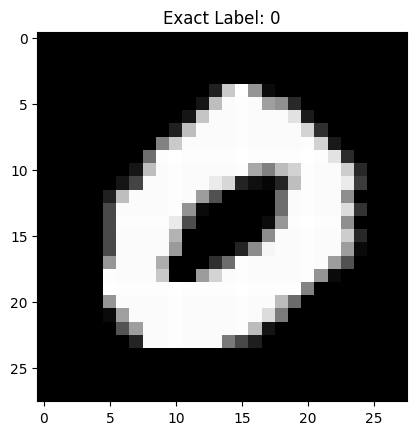

Predicted Label: 0


In [11]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

outputs = model(images[1:2])
_, predicted = torch.max(outputs.data, 1)

plt.imshow(images[1].numpy().squeeze(), cmap='gray')
plt.title(f"Exact Label: {labels[1].item()}")
plt.show()
print(f"Predicted Label: {predicted.item()}")